# counterUAV

In [1]:
# Common imports
import numpy as np
import pandas as pd
import os, sys, glob  
from os.path import isfile, isdir
import librosa
import librosa.display
import librosa.core as core
import scipy.io.wavfile as wavfile

# To plot pretty figures
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
from scipy.fftpack import fft
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")   # To rid of warnings 

os_sep = os.sep 

if sys.platform == 'win32':   # if windows 
    home = os.path.join('C:', os.sep, 'Users')      
elif sys.platform == "linux" or sys.platform == "linux2" :    
    home = os.path.expanduser("~")   # home = os.getenv("HOME")


### label file
####  checking interval

In [2]:
label_path = "C://rnn_data/rnn_label.txt"
label_file = open(label_path, 'r')

In [3]:
labels = label_file.readlines()

In [4]:
print(len(labels))
labels

27


['20181009_100023_binary.txt: w/ a person (15~28, 28~36, 151~162, 164~174, 237~253, 257~270)\n',
 '20181009_101055_binary.txt: w/ a person (38~70, 84~110)\n',
 '20181009_101420_binary.txt: w/ a person (18~36, 53~69)\n',
 '20181009_101635_binary.txt: w/ a person, w/ an iron plate (20~52, 62~83)\n',
 '20181009_102248_binary.txt: w/ a car (42~58)\n',
 '20181009_102508_binary.txt: w/ a car (28~36, 57~59)\n',
 '20181009_102849_binary.txt: w/ a car (25~32, 51~57)\n',
 '20181009_103752_binary.txt: w/ a person, w/ an iron plate (19~69, 69~107)\n',
 '20181009_104216_binary.txt: w/ a person, w/ an iron plate (8~47, 58~92)\n',
 '20181009_104446_binary.txt: w/ a person, w/ an iron plate (first), w/o the iron plate (second) (10~31, 41~57, 59~76, 85~98)\n',
 '20181009_105554_binary.txt: w/ a person (21~26, 26~30, 38~65, 65~92)\n',
 '20181009_110458_binary.txt: w/ a drone (DJI Phantom), w/o reflection tape (1~9, 36~47, 62~87, 106~115)\n',
 '20181009_110901_binary.txt: w/ a drone (DJI Phantom), w/o re

In [5]:
labels_list = []
interval_list = []
for line in labels: 
    print(line, end='')
    if line.count('a') == 0:
        continue
    else :
        label = line.split(" a ")[1].split(" ")[0].replace(",", "") 
        labels_list.append(label)
        print(label)
        
    if line.count('(') == 0:
        interval_list.append('all_interval')
        print('all interval')
    else:
        interval = line.split("(")[line.count('(')].split(")")[0].split(", ")
        interval_list.append(interval)
        print(interval) 
    print("")

20181009_100023_binary.txt: w/ a person (15~28, 28~36, 151~162, 164~174, 237~253, 257~270)
person
['15~28', '28~36', '151~162', '164~174', '237~253', '257~270']

20181009_101055_binary.txt: w/ a person (38~70, 84~110)
person
['38~70', '84~110']

20181009_101420_binary.txt: w/ a person (18~36, 53~69)
person
['18~36', '53~69']

20181009_101635_binary.txt: w/ a person, w/ an iron plate (20~52, 62~83)
person
['20~52', '62~83']

20181009_102248_binary.txt: w/ a car (42~58)
car
['42~58']

20181009_102508_binary.txt: w/ a car (28~36, 57~59)
car
['28~36', '57~59']

20181009_102849_binary.txt: w/ a car (25~32, 51~57)
car
['25~32', '51~57']

20181009_103752_binary.txt: w/ a person, w/ an iron plate (19~69, 69~107)
person
['19~69', '69~107']

20181009_104216_binary.txt: w/ a person, w/ an iron plate (8~47, 58~92)
person
['8~47', '58~92']

20181009_104446_binary.txt: w/ a person, w/ an iron plate (first), w/o the iron plate (second) (10~31, 41~57, 59~76, 85~98)
person
['10~31', '41~57', '59~76', '

In [6]:
len(labels_list)

27

In [7]:
len(interval_list)

27

### wav file

In [8]:
wav_repo = 'C://rnn_data_wav'
wav_data = glob.glob(os.path.join(wav_repo,'**','*.wav'), recursive=True)

In [9]:
print(len(wav_data))
wav_data

27


['C://rnn_data_wav\\20181009_1_100023.wav',
 'C://rnn_data_wav\\20181009_1_101055.wav',
 'C://rnn_data_wav\\20181009_1_101420.wav',
 'C://rnn_data_wav\\20181009_1_101635.wav',
 'C://rnn_data_wav\\20181009_1_103752.wav',
 'C://rnn_data_wav\\20181009_1_104216.wav',
 'C://rnn_data_wav\\20181009_1_104446.wav',
 'C://rnn_data_wav\\20181009_1_105554.wav',
 'C://rnn_data_wav\\20181009_2_102248.wav',
 'C://rnn_data_wav\\20181009_2_102508.wav',
 'C://rnn_data_wav\\20181009_2_102849.wav',
 'C://rnn_data_wav\\20181009_3_110458.wav',
 'C://rnn_data_wav\\20181009_3_110901.wav',
 'C://rnn_data_wav\\20181009_3_111450.wav',
 'C://rnn_data_wav\\20181009_3_111734.wav',
 'C://rnn_data_wav\\20181016_1_134334.wav',
 'C://rnn_data_wav\\20181016_1_135124.wav',
 'C://rnn_data_wav\\20181016_2_134532.wav',
 'C://rnn_data_wav\\20181016_3_142025.wav',
 'C://rnn_data_wav\\20181016_3_142531.wav',
 'C://rnn_data_wav\\20181114_1_135427.wav',
 'C://rnn_data_wav\\20181114_1_175502.wav',
 'C://rnn_data_wav\\20181114_2_1

In [10]:
def trim_zeros(y):
        # in mono
        if y.ndim == 1:
            _y = np.trim_zeros(y, 'f') #배열에 0을 없앰. 앞, 뒤에 있는 0만 없애고, 가운데는 보존, 'f'라는 값을 주면 맨 앞에서만 자름
            return _y

        assert y.ndim == 2 #assert는 뒤의 조건값이 false이면 에러를 발생시킴
        #값을 보장해 주기 위해 사용
        
        sync = y[0]
        data = y[1]

        data = np.trim_zeros(data, 'f')

        # match length of two channel
        d = len(sync) - len(data)
        sync = sync[d:]

        assert len(sync) == len(data)
        _y = np.vstack((sync, data)) # vstack은 배열 합치기, 행이나 열 정보가 같아야함
        return _y

#### visualizing with trim_zeros

In [15]:
def plot_specgram(file, sr=5862):
    Y, sr = librosa.load(file, mono=False) # mono=False 이므로 shape(2,~) 형태, ad an audio file as a floating point time series.
    #Audio will be automatically resampled to the given rate (default sr=22050).
    #Y는 파형이고, sr는 sampling rate
    Y =  trim_zeros(Y)
    i=1
    plt.figure(figsize=(13, 9), dpi=300) # width, height in inches [6.4, 4.8], dpi = resolution of the figure (디폴트는 100)
    
    stereo = [0, 1]
    for pos in stereo: #pos는 0  -> 1 
        plt.subplot(len(stereo), 1, i) # Create a figure and a set of subplots. #2행 1열, 이고 i번째 선택 
        Y = fft(Y)
        specgram(Y[pos], Fs=5862)
        plt.colorbar()
        plt.title('stereo {0}'.format(pos))
        i+=1
    plt.show()

20181009_1_100023.wav


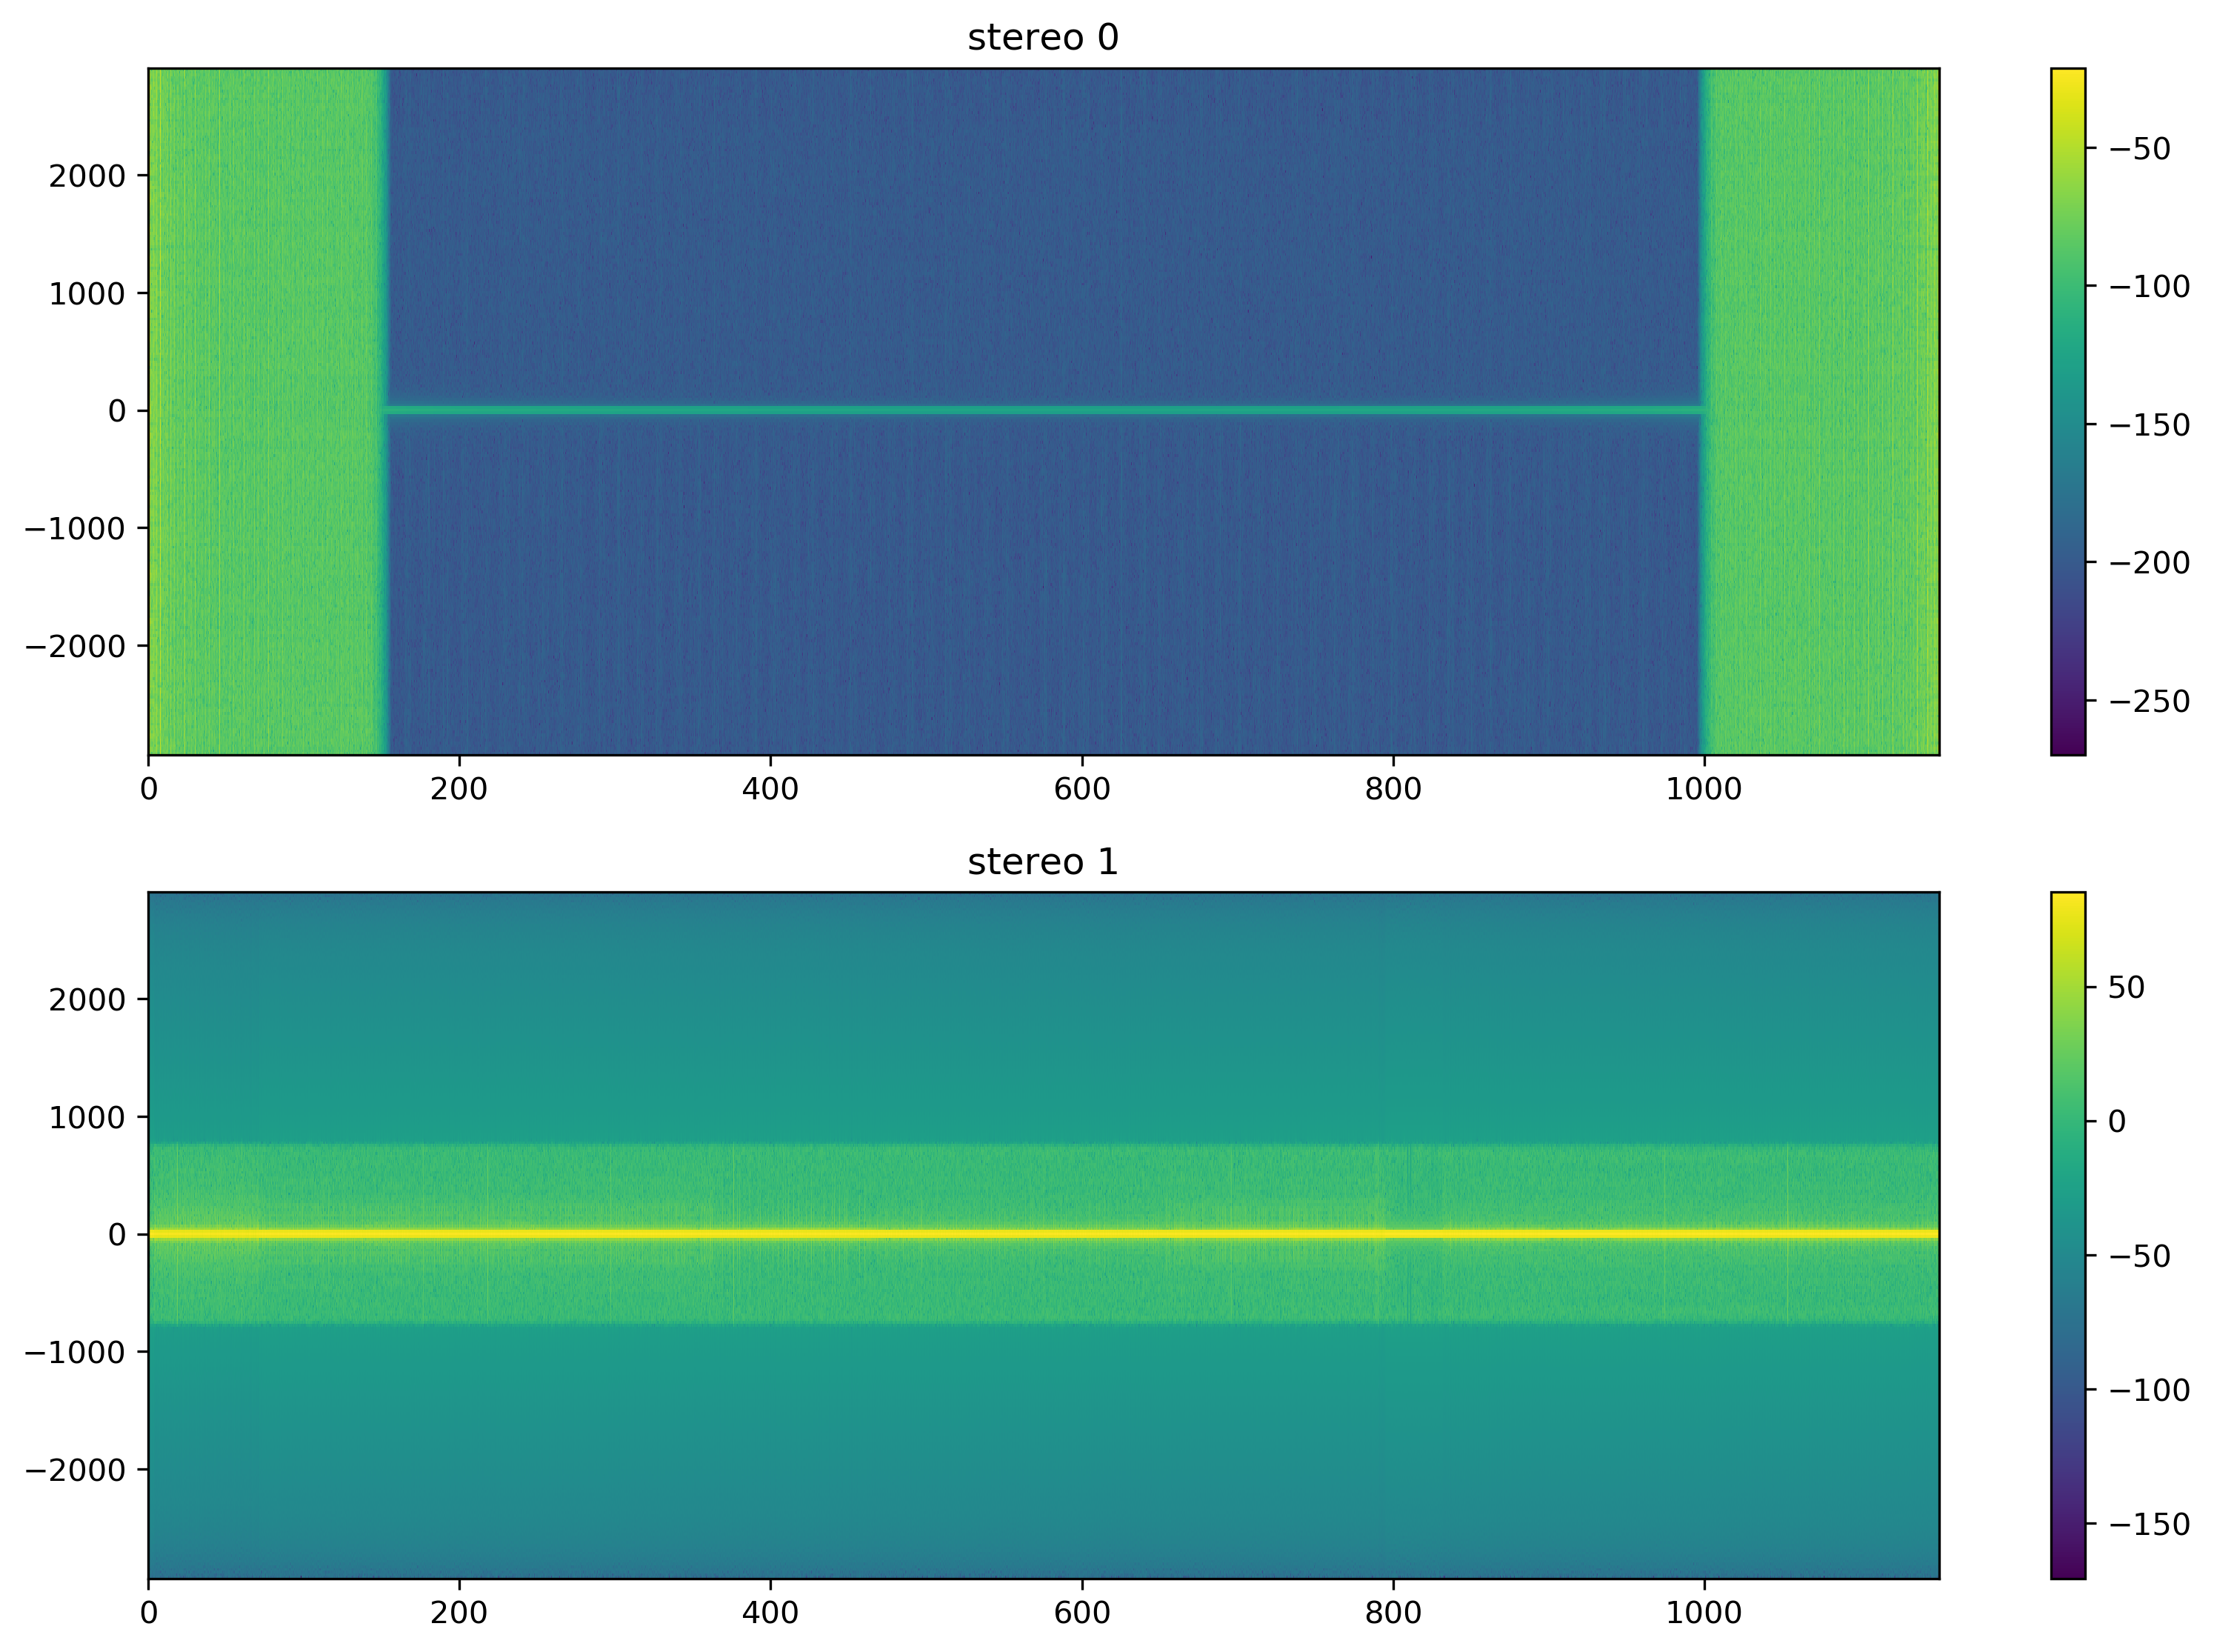

['15~28', '28~36', '151~162', '164~174', '237~253', '257~270']
20181009_1_101055.wav


In [ ]:
for i in range(len(wav_data)) :
    print(wav_data[i].split('\\')[-1])
    plot_specgram(wav_data[i])
    print(interval_list[i])

#### visualizing without trim_zeros

In [ ]:
def plot_specgram(file, sr=5862):
    Y, sr = librosa.load(file, sr=sr, mono=False) # mono=False 이므로 shape(2,~) 형태
    # Y =  trim_zeros(Y)
    i=1
    plt.figure(figsize=(13, 9), dpi=300)
    stereo = [0, 1]
    for pos in stereo:
        plt.subplot(len(stereo), 1, i) 
        specgram(Y[pos], Fs=5862) # Fs 1초에 해당하는 주파수 It is used to calculate the Fourier frequencies, freqs, in cycles per time unit. The default value is 2.
        plt.colorbar()
        plt.title('stereo {0}'.format(pos))
        i+=1
    plt.show()

In [ ]:
for i in range(len(wav_data)) :
    print(wav_data[i].split('\\')[-1])
    plot_specgram(wav_data[i])
    print(interval_list[i])

stereo 0 = sync, stereo 1 = data 이므로 input으로는 stereo 1만 사용해도 충분하다고 생각 